## [Outlier Detection Using Principal Component Analysis](https://medium.com/data-science-collective/outlier-detection-using-principal-component-analysis-with-hotellings-t2-and-spe-dmodx-methods-c9c0c76cc6c7)

> Hotelling's T2 and SPE/DmodX Methods

Principal Component Analysis (PCA) is a widely used statistical method for dimensionality reduction that preserves relevant information. PCA has a very high sensitivity that can also be used for detecting outliers in multivariate datasets.

#### Outlier Detection: Univariate vs Multivariate
Outliers can be modeled in either a univariate or multivariate approach.

In the univariate approach, outliers are detected using one variable at a time, for which data distribution analysis is a great method.

The multivariate approach uses multiple features and can therefore detect outliers with (non-)linear relationships or skewed distributions. The scikit-learn library has multiple solutions for multivariate outlier detection, such as the one-class classifier, isolation forest, and local outlier factor 

#### Anomalies vs. Novelties

Anomalies and novelties are deviant observations from standard/expected behavior. Also referred to as outliers.

There are some differences, though: anomalies are deviations that have been seen before, typically used for detecting fraud, intrusion, or malfunction.

Novelties are deviations that have not been seen before or used to identify new patterns or events. In such cases, it is important to use domain knowledge.

Both anomalies and novelties can be challenging to detect, as the definition of what is normal or expected can be subjective and vary based on the application.

#### Principal Component Analysis for Outlier Detection

Principal Component Analysis (PCA) is a linear transformation that reduces the dimensionality and searches for the direction in the data with the largest variance.

Due to the nature of the method, it is sensitive to variables with different value ranges and, thus also outliers. An advantage is that it allows visualization of the data in a two or three-dimensional scatter plot, making it easier to visually confirm the detected outliers. Furthermore, it provides good interpretability of the response variables.

Another great advantage of PCA is that it can be combined with other methods, such as different distance metrics, to improve the accuracy of the outlier detection.

In [1]:
!pip install -q numpy pandas matplotlib scikit-learn pca df2onehot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load other libraries
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()

# Make dataframe
df = pd.DataFrame(index=data.target, data=data.data, columns=data.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.shape

(178, 13)

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 2
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: float64(1

In [7]:
# Import library
from pca import pca

# Initialize pca to also detected outliers.
model = pca(normalize=True, detect_outliers=['ht2', 'spe'], n_std=2  )

# Fit and transform
results = model.fit_transform(df)

print(results)

[02-08-2025 16:48:27] [pca.pca] [INFO] Extracting column labels from dataframe.
[02-08-2025 16:48:27] [pca.pca] [INFO] Extracting row labels from dataframe.
[02-08-2025 16:48:27] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[02-08-2025 16:48:27] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 13 columns of the input data.
[02-08-2025 16:48:27] [pca.pca] [INFO] Fit using PCA.
[02-08-2025 16:48:27] [pca.pca] [INFO] Compute loadings and PCs.
[02-08-2025 16:48:27] [pca.pca] [INFO] Compute explained variance.
[02-08-2025 16:48:27] [pca.pca] [INFO] Number of components is 10 that covers 95.00% explained variance.
[02-08-2025 16:48:27] [pca.pca] [INFO] The PCA reduction is performed on the 13 columns of the input dataframe.
[02-08-2025 16:48:27] [pca.pca] [INFO] Fit using PCA.
[02-08-2025 16:48:27] [pca.pca] [INFO] Compute loadings and PCs.
[02-08-2025 16:48:27] [pca.pca] [INFO] Outlier detection using Hotelling T2 test

{'loadings':        alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2   0.483652    0.224931  0.316069          -0.010591   0.299634   
PC3  -0.207383    0.089013  0.626224           0.612080   0.130757   
PC4  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
PC5  -0.265664    0.035214 -0.143025           0.066103   0.727049   
PC6   0.213539    0.536814  0.154475          -0.100825   0.038144   
PC7  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
PC8   0.396139    0.065827 -0.170260           0.427970  -0.156361   
PC9  -0.508619    0.075283  0.307694          -0.200449  -0.271403   
PC10  0.211605   -0.309080 -0.027125           0.052799   0.067870   

      total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PC1        0.394661    0.422934             -0.298533         0.313429   
PC2        0.065040   -0.003360              0.028779         0.0393

[02-08-2025 16:48:39] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[02-08-2025 16:48:39] [scatterd.scatterd] [INFO] Add density layer
[02-08-2025 16:48:40] [scatterd.scatterd] [INFO] Create scatterplot
[02-08-2025 16:48:41] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[02-08-2025 16:48:41] [scatterd.scatterd] [INFO] Add 3D density layer
[02-08-2025 16:48:41] [scatterd.scatterd] [INFO] Create scatterplot


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


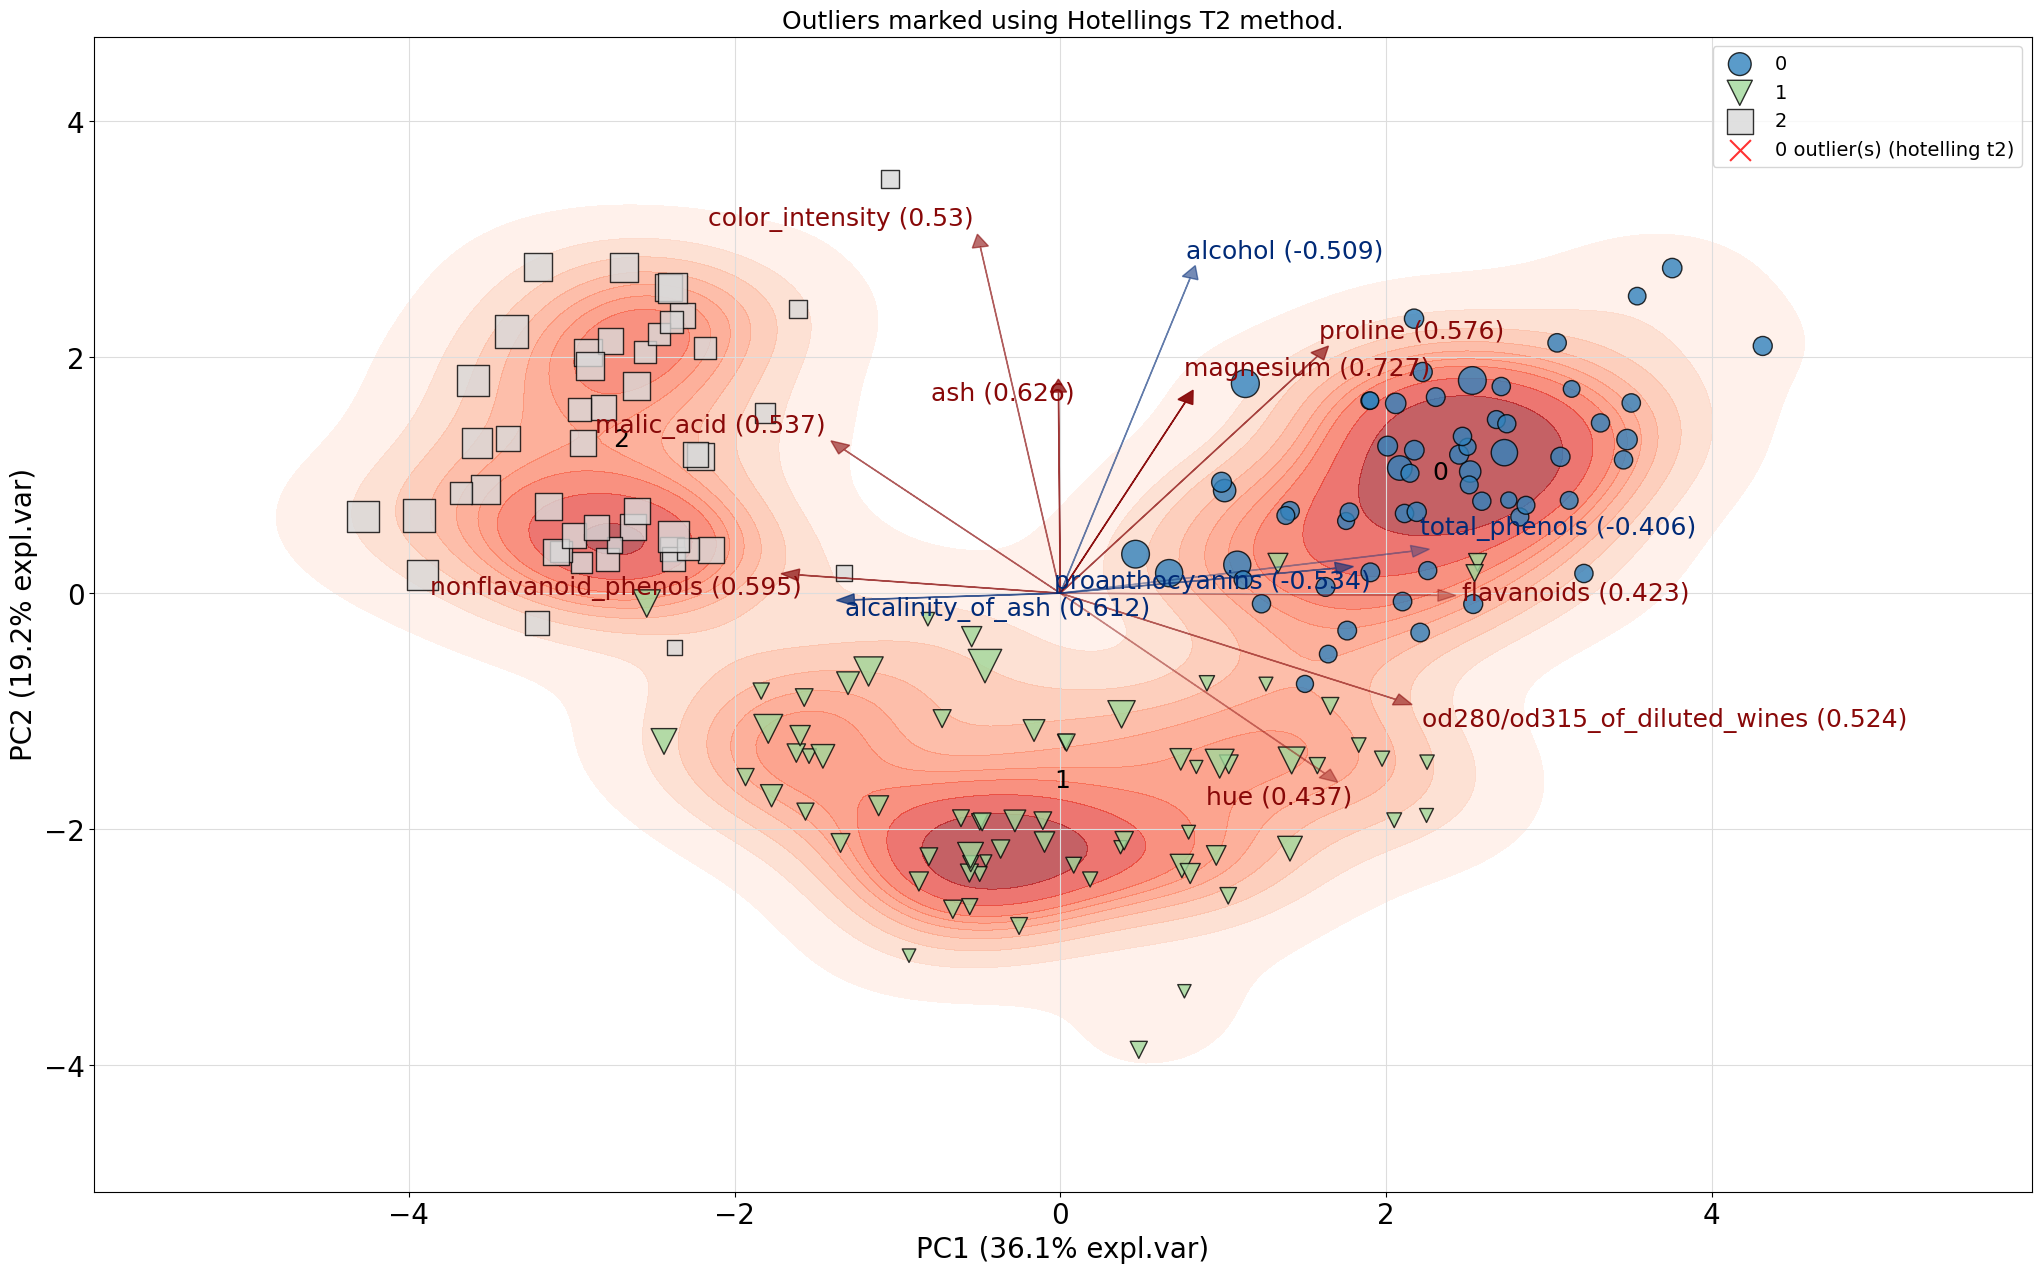

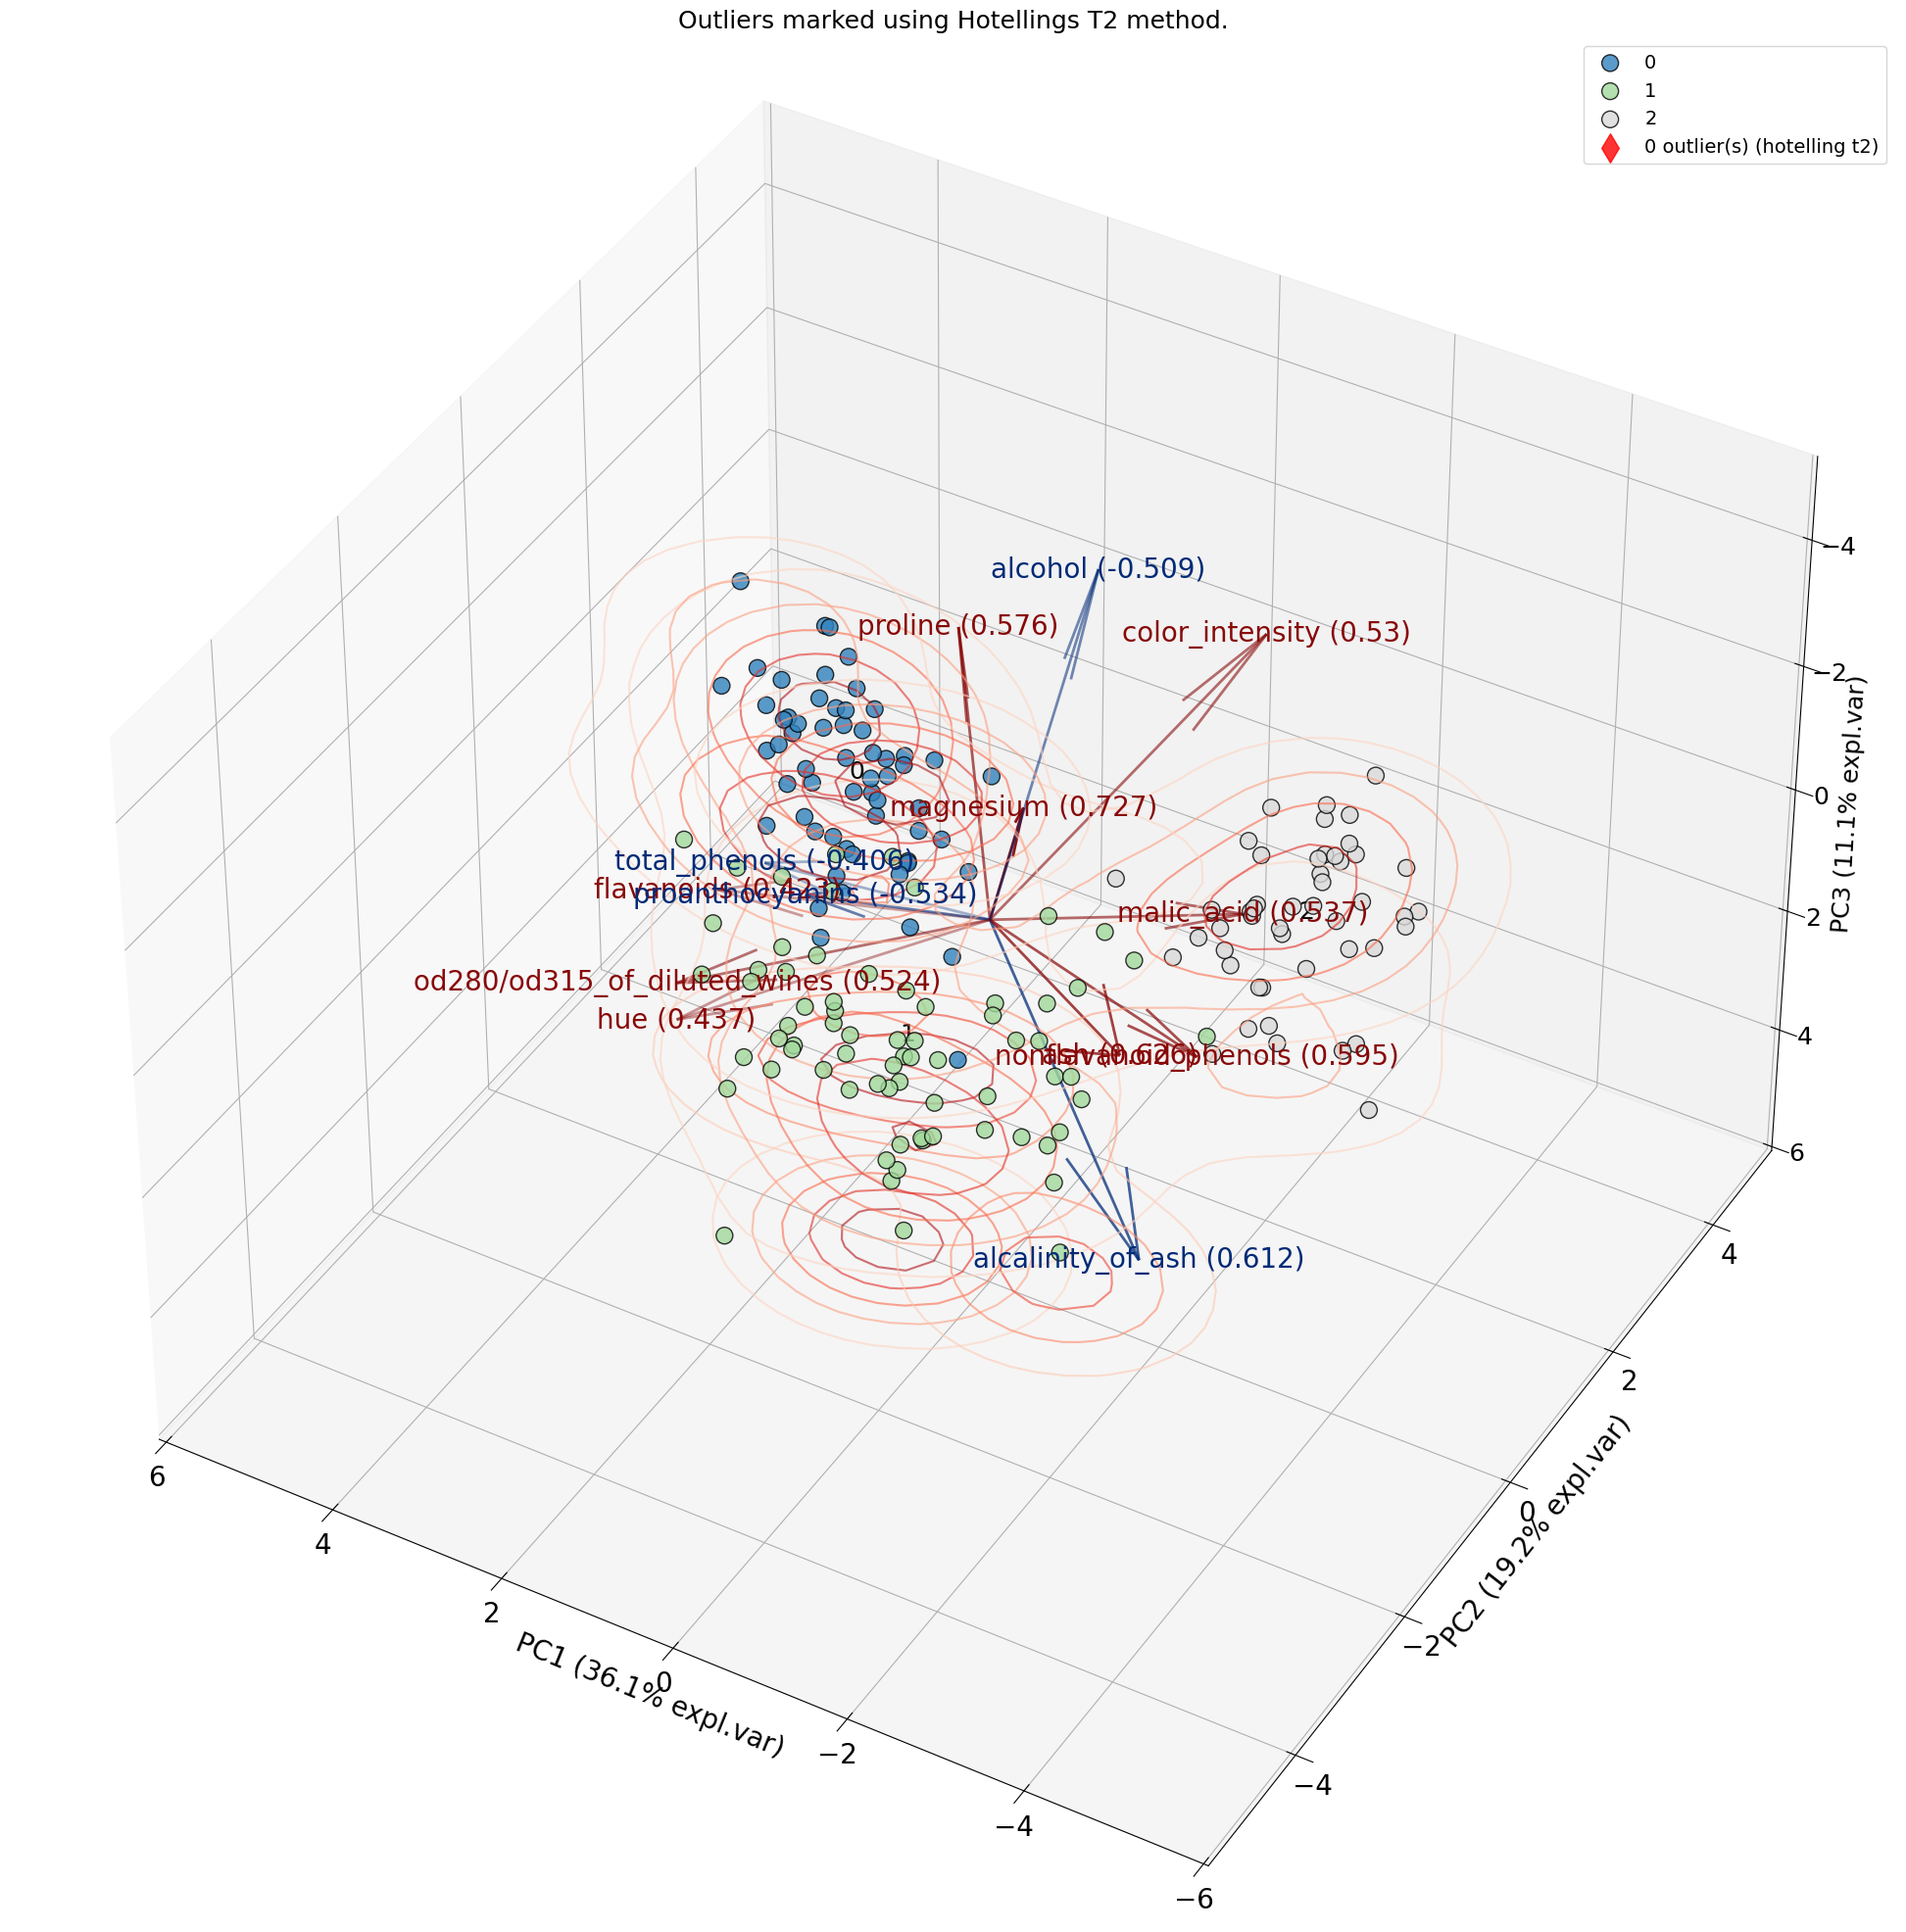

In [8]:
# Plot Hotellings T2
model.biplot(SPE=False, HT2=True, density=True, marker=data.target, s=df['malic_acid']*100, title='Outliers marked using Hotellings T2 method.')

# Make a plot in 3 dimensions
model.biplot3d(SPE=False, HT2=True, density=True, arrowdict={'scale_factor': 2.5, 'fontsize': 20}, title='Outliers marked using Hotellings T2 method.')

# Get the outliers using SPE/DmodX method.
df.loc[results['outliers']['y_bool'], :]

[02-08-2025 16:48:48] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[02-08-2025 16:48:48] [scatterd.scatterd] [INFO] Add density layer
[02-08-2025 16:48:48] [scatterd.scatterd] [INFO] Create scatterplot
[02-08-2025 16:48:48] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[2]
[02-08-2025 16:48:49] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[02-08-2025 16:48:50] [scatterd.scatterd] [INFO] Add 3D density layer
[02-08-2025 16:48:50] [scatterd.scatterd] [INFO] Create scatterplot


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0
0,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.5,1.20,3.00,1547.0
0,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.7,1.23,2.82,1680.0
1,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.5,1.38,3.12,278.0
1,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407.0
2,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.9,0.58,1.33,415.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.9,0.60,1.48,725.0
2,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.0,0.57,1.96,660.0
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0


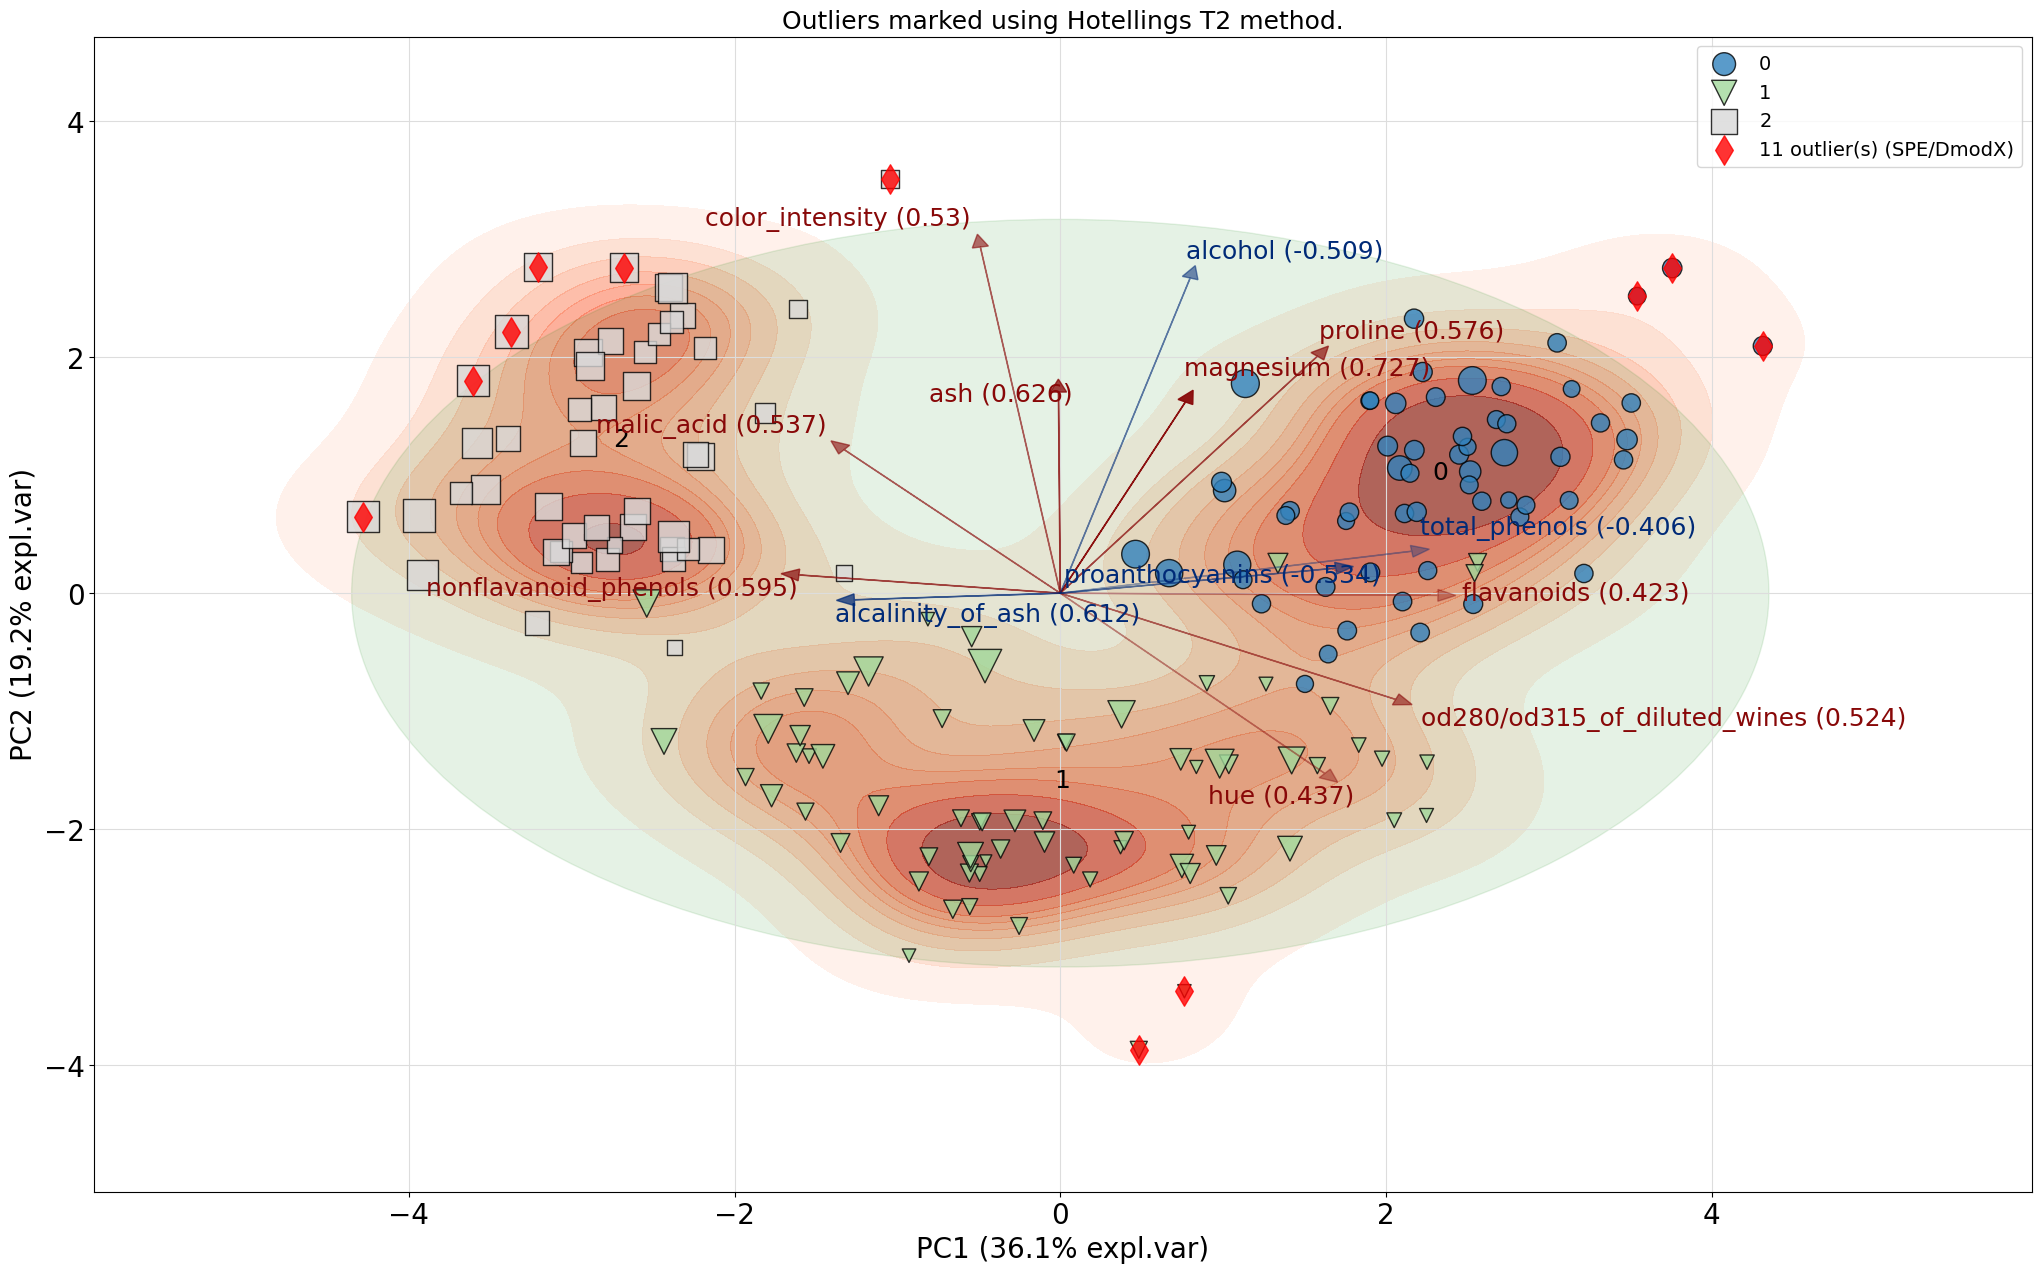

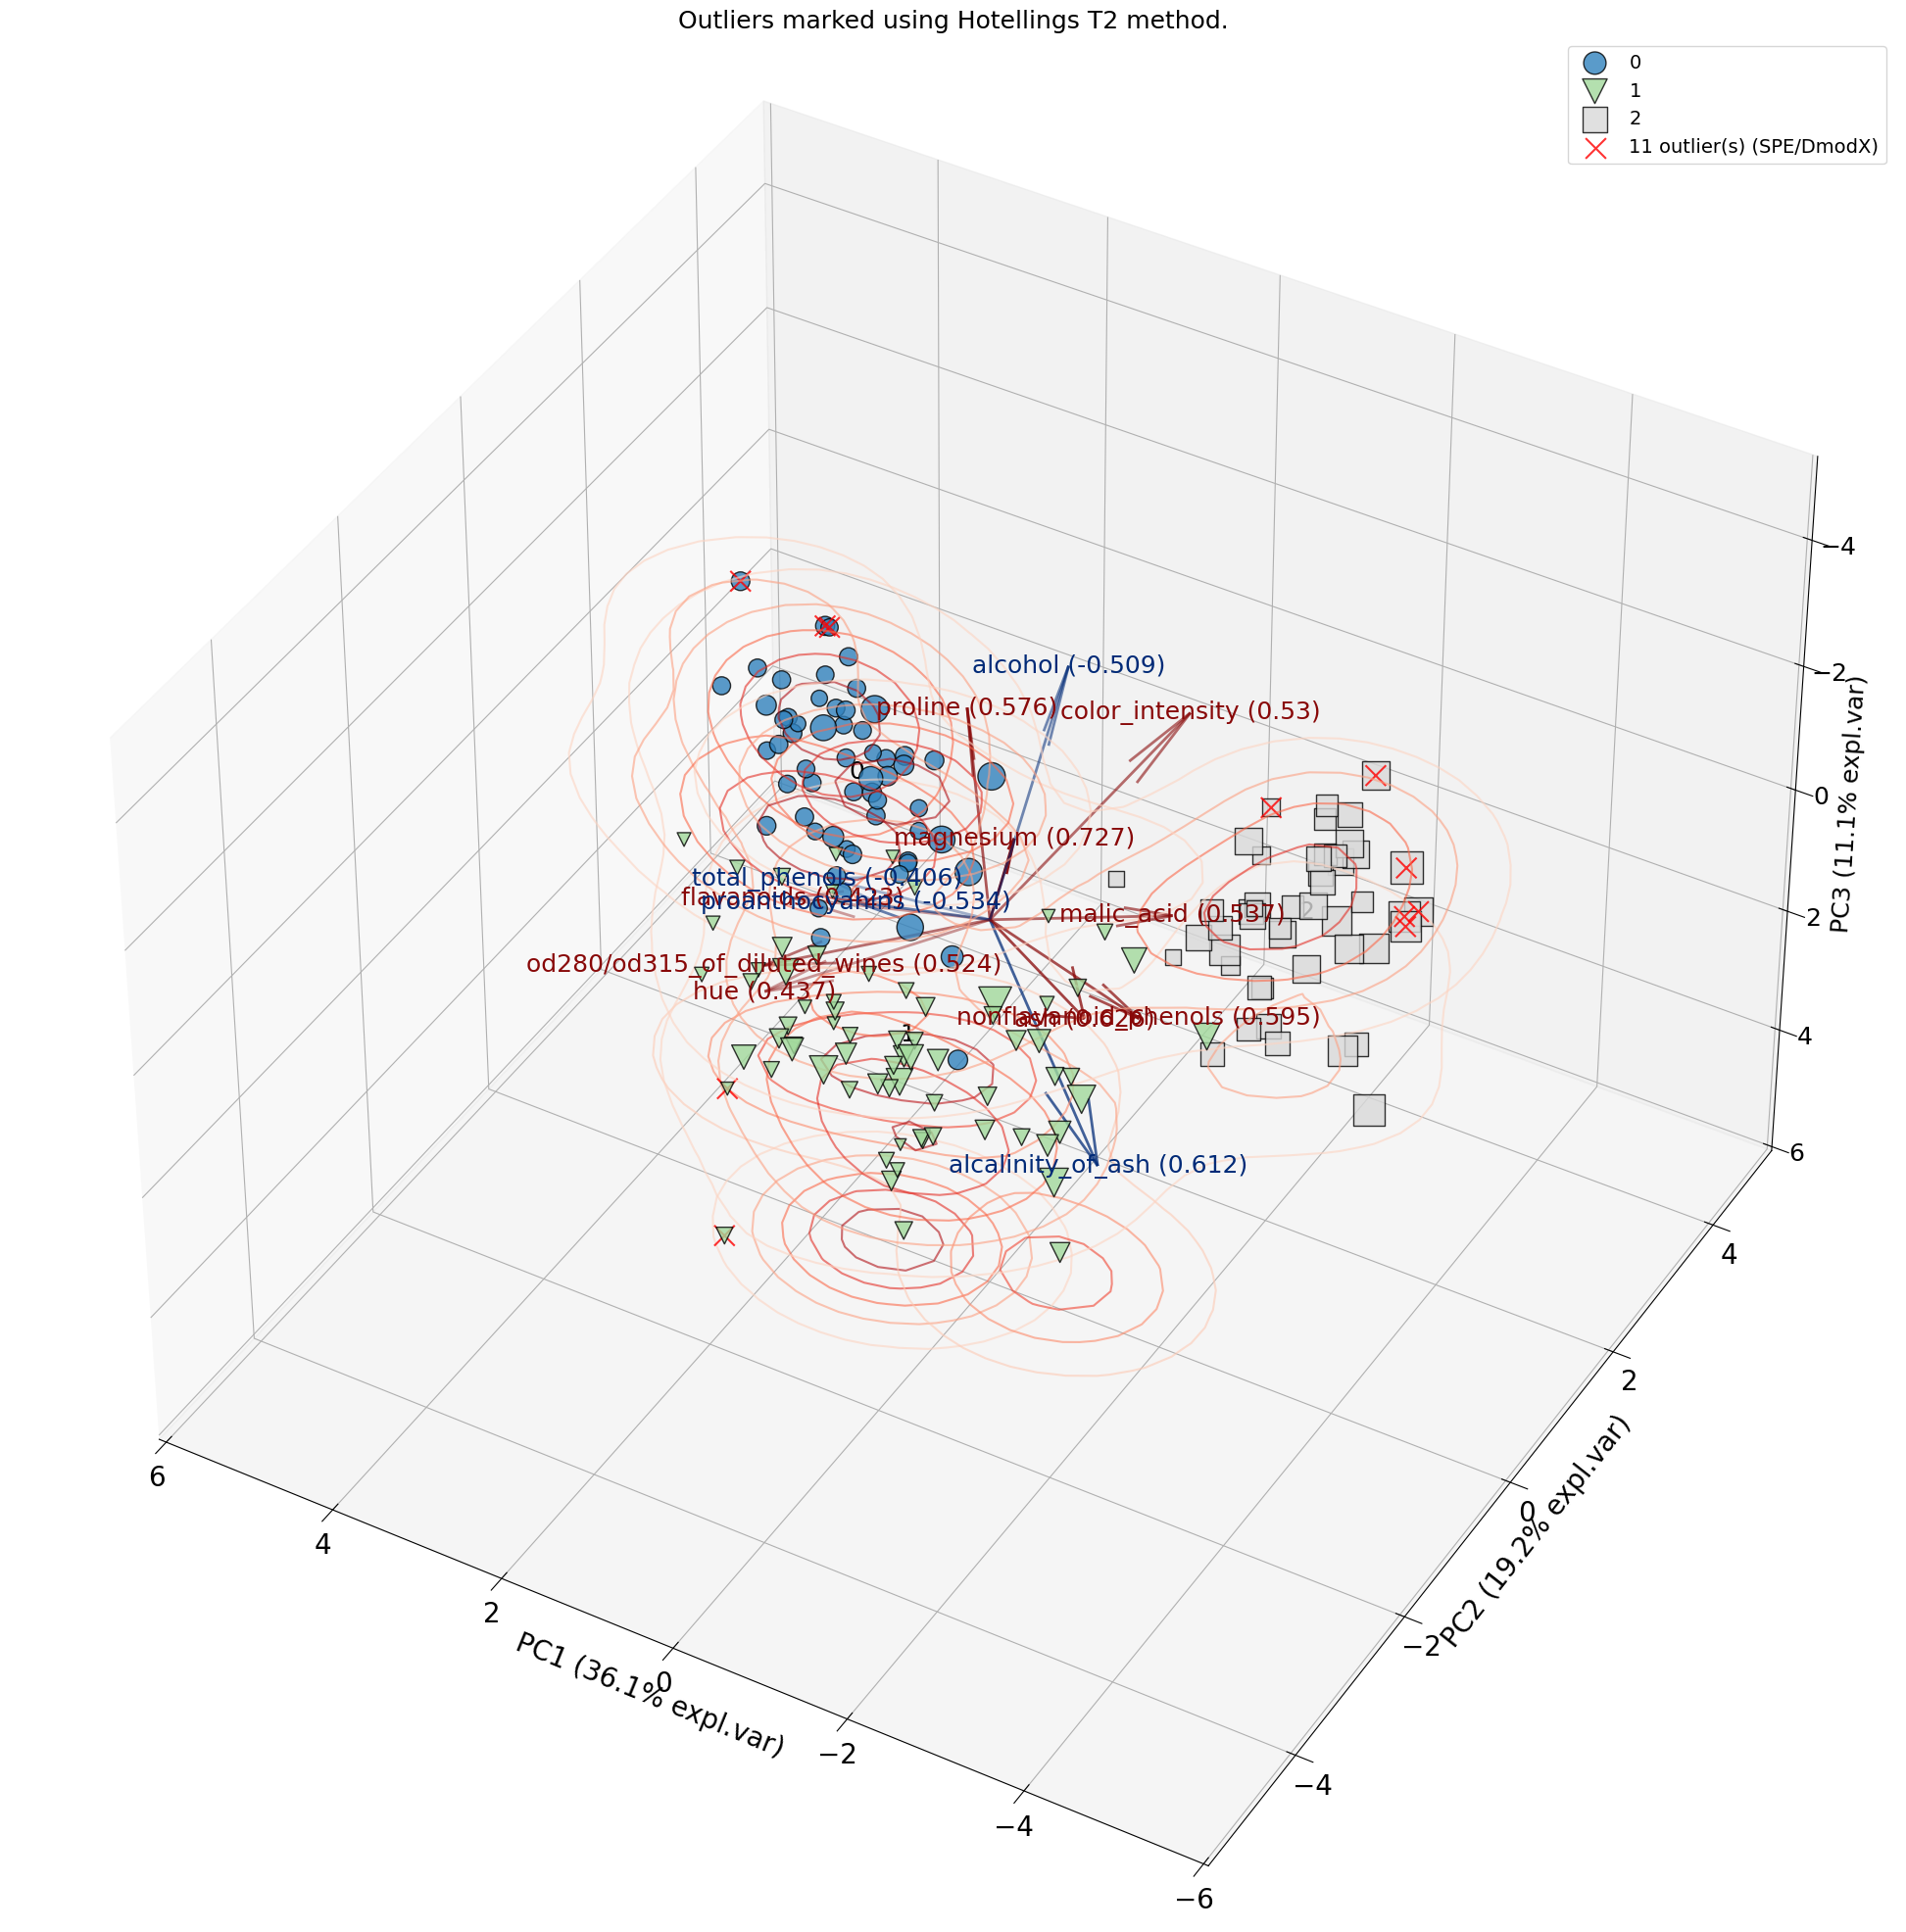

In [9]:
# Plot SPE/DmodX method
model.biplot(SPE=True, HT2=False, density=True, marker=data.target, s=df['malic_acid']*100, title='Outliers marked using Hotellings T2 method.')

# Make a plot in 3 dimensions
model.biplot3d(SPE=True, HT2=False, density=True, marker=data.target, s=df['malic_acid']*100, title='Outliers marked using Hotellings T2 method.')

# Get the outliers using SPE/DmodX method.
df.loc[results['outliers']['y_bool_spe'], :]

In [10]:
# Grab overlapping outliers
I_overlap = np.logical_and(results['outliers']['y_bool'], results['outliers']['y_bool_spe'])

# Print overlapping outliers
df.loc[I_overlap, :]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


#### Outlier Detection for Categorical Variables

In [11]:
# Import library
from pca import pca

# Initialize
model = pca()

# Load Student Performance data set
df = model.import_example(data='student')

df.head()

[02-08-2025 16:50:01] [datazets.datazets] [INFO] Import dataset [student]
[02-08-2025 16:50:01] [datazets.datazets] [INFO] Downloading [student_train.zip] dataset from github source..


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
# Initialize
from df2onehot import df2onehot

# One hot encoding
df_hot = df2onehot(df)['onehot']

print(df_hot)


[df2onehot] >Auto detecting dtypes.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 223.31it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 219.75it/s]

[df2onehot] >Total onehot features: 166
     school_GP  school_MS  sex_F  sex_M  age_15.0  age_16.0  age_17.0  \
0         True      False   True  False     False     False     False   
1         True      False   True  False     False     False      True   
2         True      False   True  False      True     False     False   
3         True      False   True  False      True     False     False   
4         True      False   True  False     False      True     False   
..         ...        ...    ...    ...       ...       ...       ...   
644      False       True   True  False     False     False     False   
645      False       True   True  False     False     False     False   
646      False       True   True  False     False     False     False   
647      False       True  False   True     False     False      True   
648      False       True  False   True     False     False     False   

     age_18.0  age_19.0  age_20.0  ...  G3_14.0  G3_15.0  G3_16.0  G3_17.0  \
0    

In [13]:
# Initialize PCA to also detected outliers.
model = pca(normalize=True,
            detect_outliers=['ht2', 'spe'],
            alpha=0.05,
            n_std=3,
            multipletests='fdr_bh')


# Fit and transform
results = model.fit_transform(df_hot)

[02-08-2025 16:50:38] [pca.pca] [INFO] Extracting column labels from dataframe.
[02-08-2025 16:50:38] [pca.pca] [INFO] Extracting row labels from dataframe.
[02-08-2025 16:50:38] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[02-08-2025 16:50:38] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 166 columns of the input data.
[02-08-2025 16:50:38] [pca.pca] [INFO] Fit using PCA.
[02-08-2025 16:50:38] [pca.pca] [INFO] Compute loadings and PCs.
[02-08-2025 16:50:38] [pca.pca] [INFO] Compute explained variance.
[02-08-2025 16:50:38] [pca.pca] [INFO] Number of components is 108 that covers 95.00% explained variance.
[02-08-2025 16:50:38] [pca.pca] [INFO] The PCA reduction is performed on the 166 columns of the input dataframe.
[02-08-2025 16:50:38] [pca.pca] [INFO] Fit using PCA.
[02-08-2025 16:50:38] [pca.pca] [INFO] Compute loadings and PCs.
[02-08-2025 16:50:38] [pca.pca] [INFO] Outlier detection using Hotelling T2 t

In [14]:
# Overlapping outliers between both methods
overlapping_outliers = np.logical_and(results['outliers']['y_bool'],
                                      results['outliers']['y_bool_spe'])
# Show overlapping outliers
df.loc[overlapping_outliers]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
279,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,12,7,8,5
284,GP,M,18,U,GT3,T,2,1,services,services,...,3,2,5,2,5,5,4,7,8,6
523,MS,M,18,U,LE3,T,4,4,at_home,health,...,5,5,5,5,5,5,2,5,6,6
605,MS,F,19,U,GT3,T,1,1,at_home,services,...,5,5,5,2,3,2,0,5,0,0
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0


[02-08-2025 16:51:36] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[02-08-2025 16:51:36] [scatterd.scatterd] [INFO] Add density layer
[02-08-2025 16:51:38] [scatterd.scatterd] [INFO] Create scatterplot
[02-08-2025 16:51:38] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'Student Performance'}, xlabel='PC1 (4.18% expl.var)', ylabel='PC2 (2.59% expl.var)'>)

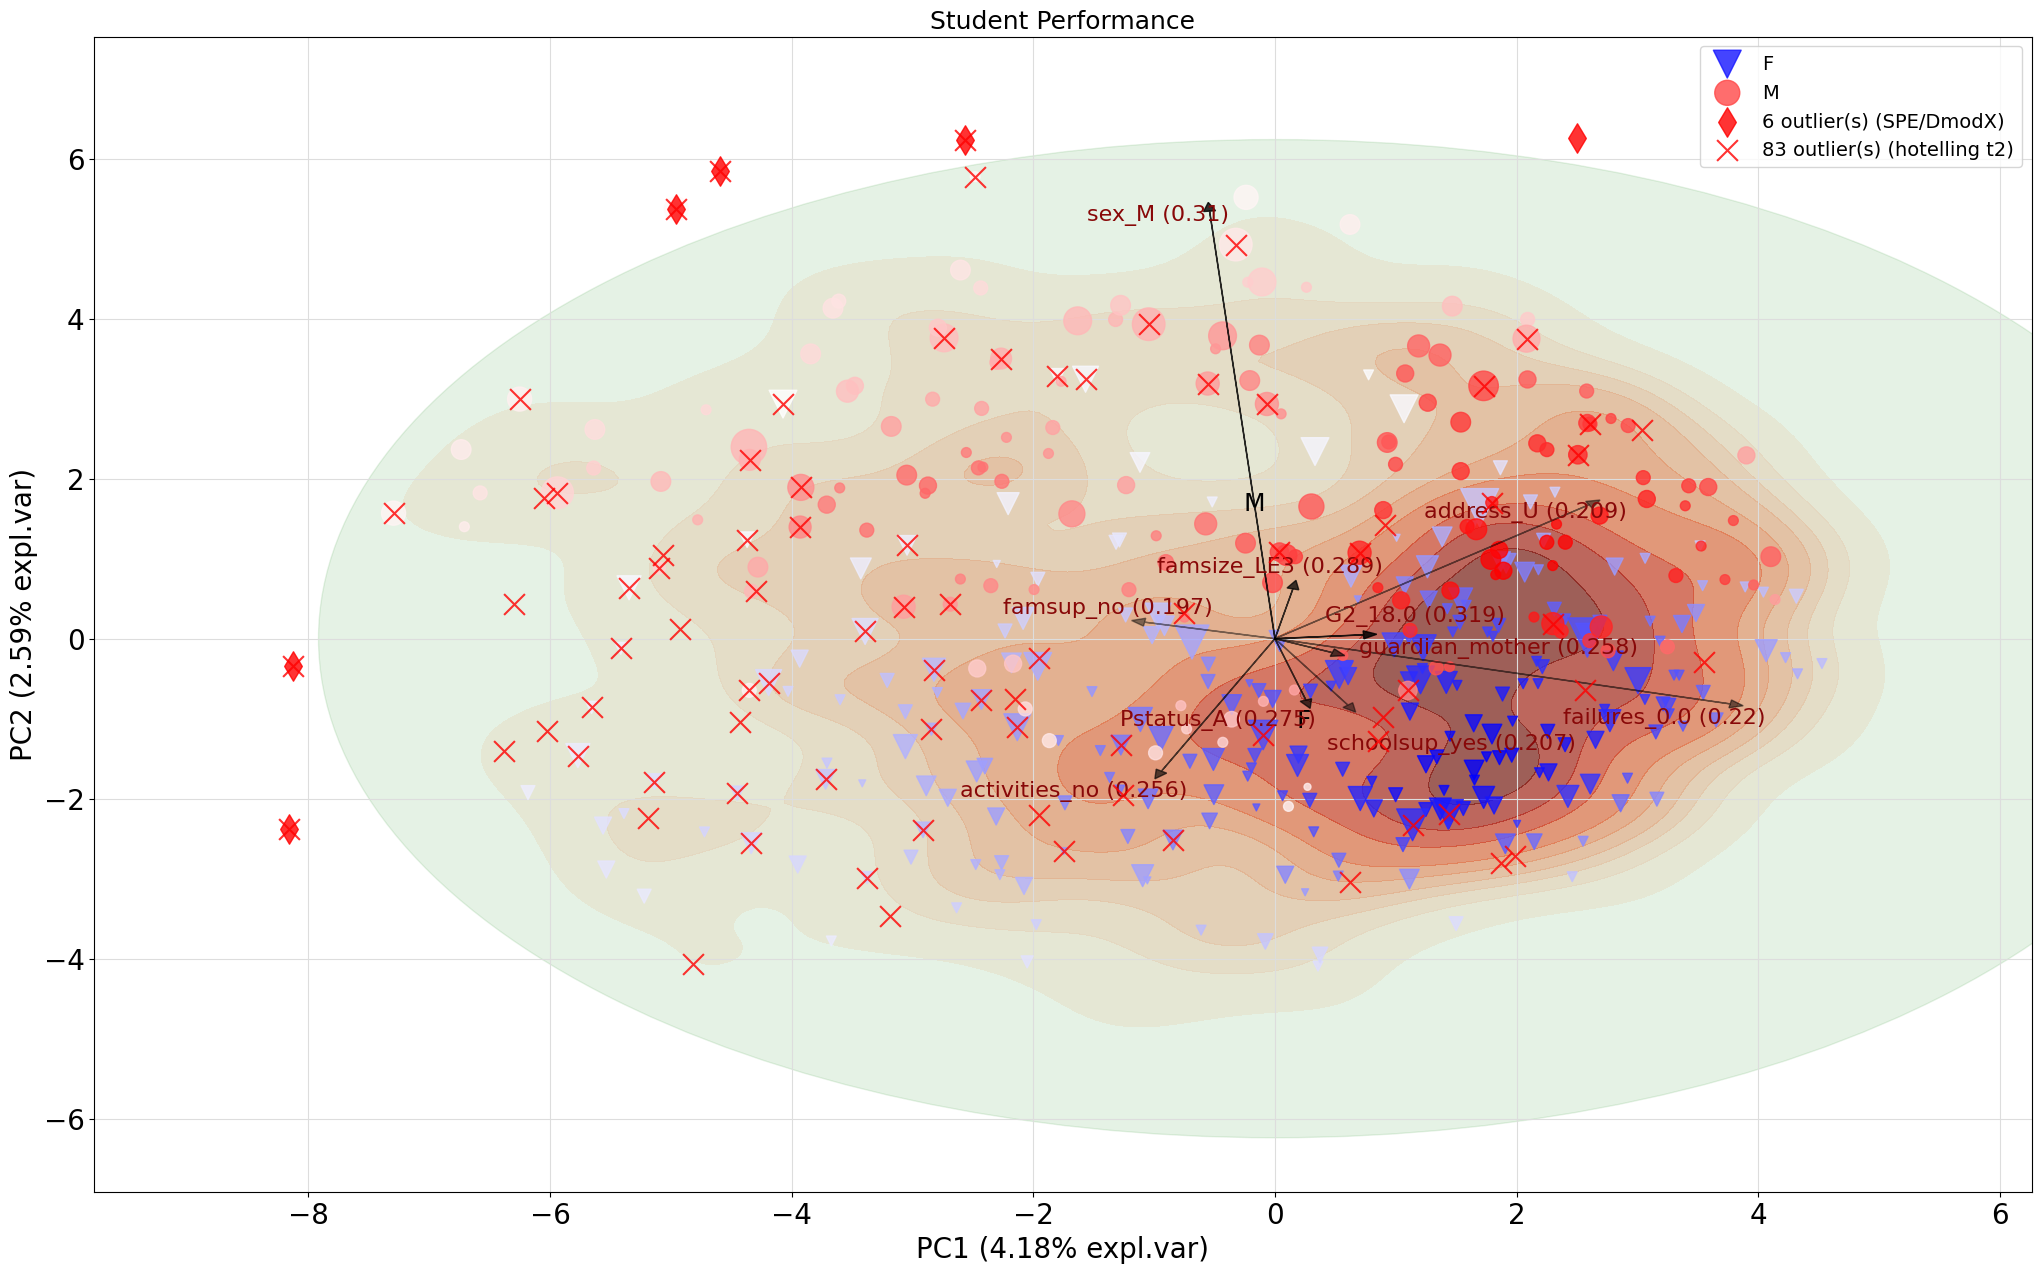

In [15]:
# Make biplot
model.biplot(SPE=True,
             HT2=True,
             n_feat=10,
             legend=True,
             labels=df['sex'],
             marker=df['sex'],
             title='Student Performance',
             figsize=(25, 15),
             color_arrow='k',
             arrowdict={'fontsize':16, 'c':'k'},
             cmap='bwr',
             gradient='#FFFFFF',
             edgecolor=None,
             density=True,
             s=df['absences']*25,
             )